In [8]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [19]:
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터분석

## skeleton

In [43]:
DATA_FILE = "/gdrive/MyDrive/Colab Notebooks/data.json"
DUMP_FILE = "/gdrive/MyDrive/Colab Notebooks/dump.pkl"

store_columns = (
    "id",  # 음식점 고유번호
    "store_name",  # 음식점 이름
    "branch",  # 음식점 지점 여부
    "area",  # 음식점 위치
    "tel",  # 음식점 번호
    "address",  # 음식점 주소
    "latitude",  # 음식점 위도
    "longitude",  # 음식점 경도
    "category",  # 음식점 카테고리
)

review_columns = (
    "id",  # 리뷰 고유번호
    "store",  # 음식점 고유번호
    "user",  # 유저 고유번호
    "score",  # 평점
    "content",  # 리뷰 내용
    "reg_time",  # 리뷰 등록 시간
)

menu_columns = (
    "id",
    "store",
    "menu_name",
    "price",
)

user_columns = (
    "id",
    "gender",
    "age",
)


def import_data(data_path=DATA_FILE):
    try:
        with open(data_path, encoding="utf-8") as f:
            data = json.loads(f.read())
    except FileNotFoundError as e:
        print(f"`{data_path}` 가 존재하지 않습니다.")
        exit(1)

    stores = []  # 음식점 테이블
    reviews = []  # 리뷰 테이블
    menus = [] # 메뉴 테이블
    users = [] # 유저 테이블
    menu_id = 0

    for d in data:
        categories = [c["category"] for c in d["category_list"]]
        stores.append(
            [
                d["id"],
                d["name"],
                d["branch"],
                d["area"],
                d["tel"],
                d["address"],
                d["latitude"],
                d["longitude"],
                "|".join(categories),
            ]
        )

        for review in d["review_list"]:
            r = review["review_info"]
            u = review["writer_info"]
            user_age = 2021 - int(u["born_year"]) + 1

            reviews.append(
                [r["id"], d["id"], u["id"], r["score"], r["content"], r["reg_time"]]
            )
            users.append(
                [u["id"], u["gender"], user_age]
            )

        for menu in d["menu_list"]:
            menus.append(
                [menu_id, d["id"], menu["menu"], menu["price"]]
            )
            menu_id +=1

    store_frame = pd.DataFrame(data=stores, columns=store_columns)
    review_frame = pd.DataFrame(data=reviews, columns=review_columns)
    memu_frame = pd.DataFrame(data=menus, columns=menu_columns)
    user_frame = pd.DataFrame(data=users, columns=user_columns)

    return {"stores": store_frame, "reviews": review_frame, "menus": memu_frame, "users":user_frame}


def dump_dataframes(dataframes):
    pd.to_pickle(dataframes, DUMP_FILE)


def load_dataframes():
    return pd.read_pickle(DUMP_FILE)


print("[*] Parsing data...")
raw_data = import_data()
print("[+] Done")

print("[*] Dumping data...")
dump_dataframes(raw_data)
print("[+] Done\n")

raw_data = load_dataframes()

[*] Parsing data...
[+] Done
[*] Dumping data...
[+] Done



In [44]:
df_users = df_users[raw_data["users"].age.between(0, 100)]
print(df_users.info())
print(df_users.age.describe())

NameError: ignored

In [16]:
print(raw_data["users"].describe())

                  id           age
count   91398.000000  91398.000000
mean   324560.215782     36.069761
std    255908.402479     34.598989
min         7.000000    -17.000000
25%    127124.000000     30.000000
50%    255093.000000     33.000000
75%    469245.000000     40.000000
max    950331.000000   2022.000000


In [21]:
users = df_users[df_users.age < 200]
f_users = df_users[df_users.age > 0]
f_users.loc['']

chart = sns.catplot(x="gender", y="age", data=f_users)
plt.title("Users' gender and age distribution")
plt.show()


NameError: ignored

In [22]:
age_baby = df_users[df_users.age.between(0, 10)].groupby(["gender"]).gender.count()
age10s = df_users[df_users.age.between(11, 20)].groupby(["gender"]).gender.count()
age20s = df_users[df_users.age.between(21, 30)].groupby(["gender"]).gender.count()
age30s = df_users[df_users.age.between(31, 40)].groupby(["gender"]).gender.count()
age40s = df_users[df_users.age.between(41, 50)].groupby(["gender"]).gender.count()
age50s = df_users[df_users.age.between(51, 60)].groupby(["gender"]).gender.count()
age60s = df_users[df_users.age.between(61, 70)].groupby(["gender"]).gender.count()
age70s = df_users[df_users.age.between(71, 80)].groupby(["gender"]).gender.count()
age80s = df_users[df_users.age.between(81, 100)].groupby(["gender"]).gender.count()
age_range = pd.concat([age_baby, age10s, age20s, age30s, age40s, age50s, age60s, age70s, age80s], ignore_index=False, keys=["Under10", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s"])
age_range = age_range.unstack(level = -1,  fill_value= 0)

NameError: ignored

In [ ]:
print(age_range)
df_new = age_range.rename(columns={'남': 'M','여':'F'})
print(df_new)

In [ ]:
df_new.plot(kind = "bar", figsize = (12,8), rot=0, fontsize = 13)
plt.xlabel("Ages", fontsize = 13)
plt.ylabel("Users", fontsize = 13)
plt.title("Users per Ages", fontsize = 16)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
print(raw_data["stores"].head())
# print(data["reviews"].head())
# print(data["users"].head())

## 무슬림친화레스토랑

In [23]:
MUSLIM_PATH = '/gdrive/MyDrive/Colab Notebooks/무슬림친화레스토랑.csv'
CSV_MUSLIM_PATH = pd.read_csv(MUSLIM_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_PATH.head())

        레스토랑명     무슬림친화도  지역  ...      휴일 주차                관광지
0       우스마니아  무슬림 자가 인증  서울  ...     NaN  X  국립중앙박물관, 이태원 쇼핑거리
1   미스터케밥 2호점   할랄 공식 인증  서울  ...     NaN  X  국립중앙박물관, 이태원 쇼핑거리
2       카파도키아  무슬림 자가 인증  부산  ...    연중무휴  O                범어사
3     올리브레스토랑  무슬림 자가 인증  인천  ...     NaN  O            송도센트럴파크
4  봄베이인도요리전문점   무슬림 프렌들리  경남  ...  매주 월요일  O          창원시립마산박물관

[5 rows x 10 columns]


## 기초통계

Store_name 최대 글자 길이

In [24]:
max(raw_data['stores'].store_name.map(lambda x: len(x)).max(), CSV_MUSLIM_PATH['레스토랑명'].map(lambda x: len(x)).max())

30

MUSLIM_FRIENDLY 최대 길이

In [25]:
CSV_MUSLIM_PATH["무슬림친화도"].map(lambda x: len(x)).max()

9

무슬림레스토랑 지역 종류 및 빈도수

In [26]:
CSV_MUSLIM_PATH['지역'].value_counts()

서울    135
경기     46
부산     30
강원     26
제주     23
대구     19
경북     12
전북     12
인천     11
경남     10
울산      9
충북      5
전남      4
광주      3
대전      1
충남      1
Name: 지역, dtype: int64

주소 최대 길이

In [27]:
# print(raw_data['stores']['address'].map(lambda x: len(x)).max())
print(CSV_MUSLIM_PATH['주소'].map(lambda x: len(x)).max())

46


## merge : skeleton + 무슬림레스토랑


In [28]:
store_table = raw_data["stores"].copy()
muslim_table = CSV_MUSLIM_PATH.copy()

In [29]:
# store_table['full_store_name'] = store_table[['store_name', 'branch']].apply(' '.join, axis=1)
# store_table['full_store_name'] = store_table["store_name"] + " " + store_table["branch"]

In [30]:
print(store_table.head())

   id     store_name branch  ...   latitude   longitude   category
0   1           Agal   None  ...  37.556862  126.926666   아구찜|포장마차
1   2         Assisy   None  ...  35.150746  126.890062         카페
2   3  Battered Sole   None  ...  37.535032  126.991664    피쉬앤칩스|펍
3   4      Chakyoung   None  ...  35.158587  129.175004  레스토랑|카프레제
4   5       Delabobo   None  ...  37.559904  126.840512  디저트카페|디저트

[5 rows x 9 columns]


In [31]:
store_table.drop_duplicates()

,id,store_name,branch,area,tel,address,latitude,longitude,category
0,1,Agal,None,홍대,010-6689-5886,서울특별시 마포구 동교동 170-13,37.556862,126.926666,아구찜|포장마차
1,2,Assisy,None,광주,062-367-0700,광주광역시 서구 농성동 631-33,35.150746,126.890062,카페
2,3,Battered Sole,None,이태원,02-749-6867,서울특별시 용산구 이태원동 118-9,37.535032,126.991664,피쉬앤칩스|펍
3,4,Chakyoung,None,달맞이길,051-756-5566,부산광역시 해운대구 중2동 1509-5,35.158587,129.175004,레스토랑|카프레제
4,5,Delabobo,None,발산역,02-2667-9854,서울특별시 강서구 등촌동 689,37.559904,126.840512,디저트카페|디저트
...,...,...,...,...,...,...,...,...,...
459983,459996,행복부대찌개,None,녹양동,031-877-2410,경기도 의정부시 녹양동 154-6,37.757939,127.032758,
459984,459997,행복부페,None,안중읍,031-682-1733,경기도 평택시 안중읍 용성리 718-3,37.002743,126.944991,
459985,459998,행복분식,None,퇴촌면,031-8071-2668,경기도 광주 퇴촌면 도수리 611-6,37.471677,127.315744,
459986,459999,행복분식,None,소주동,055-312-3713,경상남도 양산시 소주동 147-1,35.407860,129.158564,


In [32]:
store_table.columns

Index(['id', 'store_name', 'branch', 'area', 'tel', 'address', 'latitude',
       'longitude', 'category'],
      dtype='object')

In [33]:
muslim_table.columns = ['store_name', 'muslim_friendly', 'location_region', 'food_category', 'address', 'tel', 'working_time', 'days_closed','parking','tourism']
muslim_table.head()

,store_name,muslim_friendly,location_region,food_category,address,tel,working_time,days_closed,parking,tourism
0,우스마니아,무슬림 자가 인증,서울,파키스탄음식,서울 용산구 우사단로 34,02-798-7155,11:00-22:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리"
1,미스터케밥 2호점,할랄 공식 인증,서울,터키음식,서울 용산구 우사단로 42,070-7532-1997,08:00-05:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리"
2,카파도키아,무슬림 자가 인증,부산,터키음식,부산 금정구 금단로 123-9,051-515-5981,11:30-22:00,연중무휴,O,범어사
3,올리브레스토랑,무슬림 자가 인증,인천,아랍음식,인천 연수구 옥련로 31,032-874-2800,10.30-22:00,NaN,O,송도센트럴파크
4,봄베이인도요리전문점,무슬림 프렌들리,경남,인도음식,경남 창원시 성산구 용지로 74,055-263-4111,"11:30-22:00(브레이크 타임 15:00-17:00, 주말에는 브레이크 타임 없음)",매주 월요일,O,창원시립마산박물관


### 가게 이름으로 묶기


In [34]:
df_merge = pd.merge(muslim_table, store_table, on='store_name', how='left')
print(df_merge)

     store_name muslim_friendly  ...   longitude  category
0         우스마니아       무슬림 자가 인증  ...  126.995705        인도
1     미스터케밥 2호점        할랄 공식 인증  ...         NaN       NaN
2         카파도키아       무슬림 자가 인증  ...  129.092210    터키|이슬람
3       올리브레스토랑       무슬림 자가 인증  ...  128.872874          
4    봄베이인도요리전문점        무슬림 프렌들리  ...         NaN       NaN
..          ...             ...  ...         ...       ...
972       카사블랑카        무슬림 프렌들리  ...  126.987046  모로코|샌드위치
973       카사블랑카        무슬림 프렌들리  ...  128.612449          
974       카사블랑카        무슬림 프렌들리  ...  128.423302          
975       카사블랑카        무슬림 프렌들리  ...  127.029000  모로코|샌드위치
976      카페 다스티        할랄 공식 인증  ...         NaN       NaN

[977 rows x 18 columns]


In [35]:
df_merge.drop_duplicates("store_name", inplace=True)
print(df_merge.shape)

(345, 18)


In [36]:
print(muslim_table.shape)

(347, 10)


#### 가게이름으로 기초통계

In [37]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 976
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_name       345 non-null    object 
 1   muslim_friendly  345 non-null    object 
 2   location_region  345 non-null    object 
 3   food_category    288 non-null    object 
 4   address_x        345 non-null    object 
 5   tel_x            345 non-null    object 
 6   working_time     345 non-null    object 
 7   days_closed      222 non-null    object 
 8   parking          345 non-null    object 
 9   tourism          345 non-null    object 
 10  id               141 non-null    float64
 11  branch           11 non-null     object 
 12  area             139 non-null    object 
 13  tel_y            140 non-null    object 
 14  address_y        141 non-null    object 
 15  latitude         141 non-null    object 
 16  longitude        141 non-null    object 
 17  category        

주소 교집합

In [38]:
df_merge.columns

Index(['store_name', 'muslim_friendly', 'location_region', 'food_category',
       'address_x', 'tel_x', 'working_time', 'days_closed', 'parking',
       'tourism', 'id', 'branch', 'area', 'tel_y', 'address_y', 'latitude',
       'longitude', 'category'],
      dtype='object')

In [39]:
df_merge[df_merge['address_x'] == df_merge['address_y']]

,store_name,muslim_friendly,location_region,food_category,address_x,tel_x,working_time,days_closed,parking,tourism,id,branch,area,tel_y,address_y,latitude,longitude,category


In [40]:
df_merge[df_merge['tel_x'] == df_merge['tel_y']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 962
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_name       74 non-null     object 
 1   muslim_friendly  74 non-null     object 
 2   location_region  74 non-null     object 
 3   food_category    63 non-null     object 
 4   address_x        74 non-null     object 
 5   tel_x            74 non-null     object 
 6   working_time     74 non-null     object 
 7   days_closed      48 non-null     object 
 8   parking          74 non-null     object 
 9   tourism          74 non-null     object 
 10  id               74 non-null     float64
 11  branch           4 non-null      object 
 12  area             72 non-null     object 
 13  tel_y            74 non-null     object 
 14  address_y        74 non-null     object 
 15  latitude         74 non-null     object 
 16  longitude        74 non-null     object 
 17  category         

### 전화번호로 묶기

In [41]:
df_tel= pd.merge(muslim_table, store_table, on='tel')
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   store_name_x     244 non-null    object
 1   muslim_friendly  244 non-null    object
 2   location_region  244 non-null    object
 3   food_category    200 non-null    object
 4   address_x        244 non-null    object
 5   tel              244 non-null    object
 6   working_time     244 non-null    object
 7   days_closed      162 non-null    object
 8   parking          244 non-null    object
 9   tourism          244 non-null    object
 10  id               244 non-null    int64 
 11  store_name_y     244 non-null    object
 12  branch           32 non-null     object
 13  area             240 non-null    object
 14  address_y        244 non-null    object
 15  latitude         244 non-null    object
 16  longitude        244 non-null    object
 17  category         244 non-null    ob

In [42]:
# null 값 일 수도  있음
df_tel.drop_duplicates("tel").shape

(234, 18)

## merge : review + user

In [45]:
user_table = raw_data["users"].copy()
user_table.columns

Index(['id', 'gender', 'age'], dtype='object')

In [46]:
review_table = raw_data["reviews"].copy()
review_table.columns

Index(['id', 'store', 'user', 'score', 'content', 'reg_time'], dtype='object')

In [47]:
df_review_user = pd.merge(review_table, user_table, left_on='user', right_on='id')
df_review_user.drop_duplicates("content", inplace=True)
df_review_user.columns

Index(['id_x', 'store', 'user', 'score', 'content', 'reg_time', 'id_y',
       'gender', 'age'],
      dtype='object')

In [52]:
df_review_user.head()

,id_x,store,user,score,content,reg_time,id_y,gender,age
0,1,15,68632,5,전포 윗길에 새로 생긴! 호주에서 온 쉐프가 직접 요리하는 호주식 레스토랑!,1970-01-01 00:00:00,68632,남,32
121,326,1216,68632,5,간단하게 먹으러 갔다가 얼큰우동에 반하고 나오는 24시 우동집!,1970-01-01 00:00:00,68632,남,32
242,1413,8756,68632,5,식사보다는 말그대로 피맥으로 한잔하기에 딱 좋은 피자!,1970-01-01 00:00:00,68632,남,32
363,1528,9460,68632,5,파란 컨테이너의 외관부터 너무 이쁜 건대 커멘그래운드 2층의 루프탑카페! 분위기 좋...,2019-04-06 12:52:22,68632,남,32
484,4681,13745,68632,5,가야공원에서 제일 맛있는 오리고기집~ 다 먹고 볶음밥 볶아 먹으면.. 크~~,2018-11-28 15:12:33,68632,남,32


## merge: merged + reivew_merged

In [48]:
df_review_user = pd.merge(review_table, user_table, left_on='user', right_on='id')
df_review_user.drop_duplicates("content", inplace=True)
df_review_user.columns

Index(['id_x', 'store', 'user', 'score', 'content', 'reg_time', 'id_y',
       'gender', 'age'],
      dtype='object')

In [49]:
df_merged = pd.merge(df_merge, df_review_user, left_on='id', right_on='store')
df_merged.shape

(113, 27)

In [50]:
df_tel_merged = pd.merge(df_tel, df_review_user, left_on='id', right_on='store')
df_tel_merged.shape

(179, 27)

In [51]:
df_tel_merged.describe

<bound method NDFrame.describe of     store_name_x muslim_friendly location_region  ...    id_y gender age
0          우스마니아       무슬림 자가 인증              서울  ...   90292      여  26
1          우스마니아       무슬림 자가 인증              서울  ...  225842      여  23
2      미스터케밥 2호점        할랄 공식 인증              서울  ...  109581      여  34
3         케르반 카페       무슬림 자가 인증              서울  ...  109581      여  34
4     라마앤바바나 서면점        무슬림 프렌들리              부산  ...  728391      남  39
..           ...             ...             ...  ...     ...    ...  ..
174         전주식당        무슬림 프렌들리              서울  ...  171967      여  34
175         전주식당        무슬림 프렌들리              서울  ...    5142      여  25
176      사마르칸트시티        무슬림 프렌들리              서울  ...  155100      남  36
177       뿌자레스토랑        무슬림 프렌들리              서울  ...  159353      여  27
178    봄베이브로이 울산        무슬림 프렌들리              울산  ...   58205      여  42

[179 rows x 27 columns]>

# KNN 알고리즘 적용

## KNN이란
- KNN = K-Nearest Neighbor
- 최근접 이웃 알고리즘이라고 함
- 새로운 데이터를 입력 받았을 때 이 데이터와 가장 근접한 데이터들의 종류가 무엇인지 확인하고 많은 데이터의 종류로 분류하는 알고리즘 
- Classification의 대표적인 알고리즘으로 지도 학습(supervisor Learning)에 해당


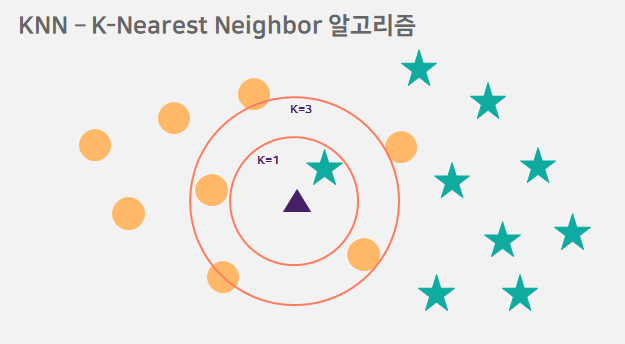

## KNN 예제

총 3단계를 가짐

1. 거리 계산하기
2. 가장 근처에 있는 요소 뽑기
3. 예측하기

In [ ]:
# 예제 데이터 셋
# [x, y, type]
# type: 위 사진에서 원과 별을 구분
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

### 거리 계산

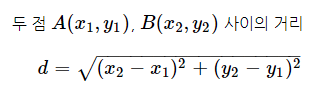


In [ ]:
from math import sqrt

# calculate the Euclidean distance between two vectors
# row = [x, y, type]
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [ ]:
# row0이라는 점을 기준으로 각 점들과의 거리 계산
row0 = [3,3]
for row in dataset:
	distance = euclidean_distance(row0, row)
	print(distance)

0.2189163999999999
1.534510628
0.3965616879999998
1.61192981
0.06407232000000018
4.627531214
2.3324412480000003
3.922596716
5.675418650999999
4.673756466


### 가장 근처에 있는 요소 뽑기

In [ ]:
# train: 데이터 셋
# test_row: 측정하고자 하는 좌표 (target)
# num_neighbors: K
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [ ]:
# 가장 가까운 3개의 좌표
neighbors = get_neighbors(dataset, row0, 3)
for neighbor in neighbors:
	print(neighbor)

[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]


### 예측

In [ ]:
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	for neighbor in neighbors:
		print(neighbor)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [ ]:
# 3,3에서 예측
row0 = [3,3,0]

prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]
Expected 0, Got 0.


In [ ]:
# 6,5에서 예측
row0 = [6,5,0]

prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[7.673756466, 3.508563011, 1]
[3.396561688, 4.400293529, 0]
[7.627531214, 2.759262235, 1]
Expected 0, Got 1.


## KNN 적용
1. 무슬림 음식점에 대한 리뷰를 한 건이라도 작성한 유저들을 모은다.
2. 각각의 유저들의 모든 리뷰 값을 불러 온다.
3. 평점이 높은 음식점의 대표값 (예_카테고리) top 3를 고른다.
    - 사전 작업) 음식점의 대표 카테고리 값을 먼저 선정한다.

        과정

        - 전체 카테고리별 리뷰 평점 순 나열
        - 최신 리뷰 남긴 카테고리 별 나열
        - 두 나열에 가중치를 곱하여 최상위 1개의 카테고리를 유저에게 부여
            - 만약 리뷰가 없는 카테고리인 경우 가장 낮은 가중치 부여 ( 0 )

4. 완성된 user data를 가지고 KNN 돌려버린닷!

### 무슬림 음식점에 대한 리뷰를 한 건이라도 작성한 유저들을 모은다

In [162]:
#review + user
df = df_review_user.drop(['content','user','id_y','id_x'], axis = 1)
df.head()

,store,score,reg_time,gender,age
0,15,5,1970-01-01 00:00:00,남,32
121,1216,5,1970-01-01 00:00:00,남,32
242,8756,5,1970-01-01 00:00:00,남,32
363,9460,5,2019-04-06 12:52:22,남,32
484,13745,5,2018-11-28 15:12:33,남,32


In [163]:
#서울무슬림식당
MUSLIM_PATH = '/gdrive/MyDrive/Colab Notebooks/myDF5.csv'
CSV_MUSLIM_PATH = pd.read_csv(MUSLIM_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_PATH.describe)

<bound method NDFrame.describe of      Unnamed: 0     store_name  ...                         address_y  category
0             0          우스마니아  ...               서울시 용산구 이태원동 137-56      인도음식
1             2            미가미  ...               서울시 서초구 서초동 1337-32        일식
2             4           패밀리아  ...  서울시 강남구 논현동 248-7 임피리얼 팰리스 호텔 2층       뷔페식
3             5             깔리  ...           서울특별시 종로구 명륜4가 170-3 2층      인도음식
4             8          세븐스퀘어  ...               서울특별시 중구 태평로2가 23-5       뷔페식
..          ...            ...  ...                               ...       ...
131         479  오리지날 팍인디아레스토랑  ...                               NaN     아시아음식
132         480            페트라  ...                서울특별시 용산구 이태원동 552        양식
133         481        모로코코 카페  ...              서울특별시 용산구 용산동2가 45-9        양식
134         484          카사블랑카  ...              서울특별시 용산구 용산동2가 44-8      샌드위치
135         488         카페 다스티  ...                               NaN        카페

[136 

### 각각의 유저들의 모든 리뷰 값을 불러 온다.

In [164]:
store_table = df.copy()
muslim_table = CSV_MUSLIM_PATH.copy()
df_merge = pd.merge(muslim_table, store_table, left_on='id', right_on='store')
print(df_merge)

    Unnamed: 0 store_name  ... gender  age
0            0      우스마니아  ...      여   26
1            0      우스마니아  ...      여   23
2            2        미가미  ...      여   29
3            5         깔리  ...      남   29
4            5         깔리  ...      여   35
..         ...        ...  ...    ...  ...
78         481    모로코코 카페  ...      여   34
79         481    모로코코 카페  ...      여   36
80         481    모로코코 카페  ...      여   32
81         481    모로코코 카페  ...      남   28
82         481    모로코코 카페  ...      여   30

[83 rows x 11 columns]


### 전체 카테고리별 리뷰 평점 순 나열
인도음식     47

한식       30

양식       19

터키음식     11

아시아음식     8
뷔페식       7

일식        7

카페        3

중식        2

베이커리      1

샌드위치      1

In [190]:
print(type(df_merge.age))

<class 'pandas.core.series.Series'>


In [191]:
temp = df_merge.copy()

tgroup = temp.groupby(["category", "store"])
scores = tgroup.mean().round(2)
print(scores.sort_values(by=['score'],ascending=False).reset_index())

   category   store  Unnamed: 0        id  score    age
0      인도음식  123857       104.0  123857.0   5.00  33.00
1      터키음식  159619       121.0  159619.0   5.00  34.00
2        일식  155677         2.0  155677.0   5.00  29.00
3      인도음식  293759        91.0  293759.0   4.33  32.67
4        한식  169083       118.0  169083.0   4.33  27.67
5      인도음식   55195         5.0   55195.0   4.25  33.31
6      인도음식  308561         0.0  308561.0   4.00  24.50
7     아시아음식  204250       447.0  204250.0   4.00  28.00
8        한식  293929       106.0  293929.0   4.00  24.00
9        양식  149007       481.0  149007.0   4.00  32.33
10     인도음식   94067        89.0   94067.0   4.00  29.67
11     인도음식   94117       170.0   94117.0   4.00  25.00
12     인도음식  125830       474.0  125830.0   4.00  30.00
13     인도음식  258479       105.0  258479.0   4.00  32.50
14      뷔페식  224459         8.0  224459.0   4.00  37.33
15       한식  355301       254.0  355301.0   3.71  32.43
16     인도음식  298567       171.0  298567.0   3.67

### X축: (남: -1, 여: 1) * Age
### Y축: Score

In [193]:
scores

Unnamed: 0        id  score    age
category store                                     
뷔페식      44333        242.0   44333.0   3.50  34.25
         224459         8.0  224459.0   4.00  37.33
아시아음식    204250       447.0  204250.0   4.00  28.00
         204252       453.0  204252.0   3.00  38.50
양식       149007       481.0  149007.0   4.00  32.33
인도음식     55195          5.0   55195.0   4.25  33.31
         94067         89.0   94067.0   4.00  29.67
         94117        170.0   94117.0   4.00  25.00
         123857       104.0  123857.0   5.00  33.00
         125830       474.0  125830.0   4.00  30.00
         165645       113.0  165645.0   2.67  34.00
         258479       105.0  258479.0   4.00  32.50
         285720       178.0  285720.0   3.50  44.50
         293759        91.0  293759.0   4.33  32.67
         298567       171.0  298567.0   3.67  30.00
         308561         0.0  308561.0   4.00  24.50
         328527       244.0  328527.0   1.00  26.00
일식       155677         2.0  155677.0   5.00  29.00
         279485       179.0  279485.0   3.17  31.67
터키음식     159619       121.0  159619.0   5.00  34.00
         159620       122.0  159620.0   3.50  35.50
한식       145335       163.0  145335.0   2.00  39.00
         169083       118.0  169083.0   4.33  27.67
         293929       106.0  293929.0   4.00  24.00
         344831       423.0  344831.0   3.50  29.50
         355301       254.0  355301.0   3.71  32.43

### KNN 실행

In [189]:
from matplotlib import pyplot as plt
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()

NameError: ignored

#Collaborative-Filtering (User)

In [53]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [54]:
import numpy as np
import scipy.stats
import scipy.spatial
from sklearn.model_selection import KFold
import random
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
import warnings
import sys

users = 123

In [55]:
df_review_user.head()

,id_x,store,user,score,content,reg_time,id_y,gender,age
0,1,15,68632,5,전포 윗길에 새로 생긴! 호주에서 온 쉐프가 직접 요리하는 호주식 레스토랑!,1970-01-01 00:00:00,68632,남,32
121,326,1216,68632,5,간단하게 먹으러 갔다가 얼큰우동에 반하고 나오는 24시 우동집!,1970-01-01 00:00:00,68632,남,32
242,1413,8756,68632,5,식사보다는 말그대로 피맥으로 한잔하기에 딱 좋은 피자!,1970-01-01 00:00:00,68632,남,32
363,1528,9460,68632,5,파란 컨테이너의 외관부터 너무 이쁜 건대 커멘그래운드 2층의 루프탑카페! 분위기 좋...,2019-04-06 12:52:22,68632,남,32
484,4681,13745,68632,5,가야공원에서 제일 맛있는 오리고기집~ 다 먹고 볶음밥 볶아 먹으면.. 크~~,2018-11-28 15:12:33,68632,남,32


In [156]:
f = df_review_user.copy()

df  =  f.drop(['content','user','id_y','id_x', 'reg_time'], axis = 1)
nf = df.to_numpy()
print(nf)
data_score = []
data_score = f.score
data_gender = []
data_gender = f.gender
data_age = []
data_age = f.age
data_store = []
data_store = f.store

# data1 = np.zeros((4, 81153))
data = []
for row in df:
		df = row.split(',')
		e = [df[0]]
		data.append(e)
print(data)

# print(data1)

# for r in range(len(data)):
#   data1[r][0] = data_score

# for r in range(len(data)):
#   data1[r][1] = data_gender

# for r in range(len(data)):
#   data1[r][2] = data_age

# for r in range(len(data)):
#   data1[r][3] = data_store

# for r in range(len(data)):
#   for c in range(len(data[r])):
#     data[r][c]

[[15 5 '남' 32]
 [1216 5 '남' 32]
 [8756 5 '남' 32]
 ...
 [360464 4 '남' 29]
 [360465 5 '여' 27]
 [360467 5 '남' 34]]
[['store'], ['score'], ['gender'], ['age']]


In [ ]:
def similarity_user(data):
	print "Hello User"
	#f_i_d = open("sim_user_based.txt","w")
	user_similarity_jaccard = np.zeros((users,users))
	for user1 in range(users):
		print user1
		for user2 in range(users):
			if np.count_nonzero(data[user1]) and np.count_nonzero(data[user2]):
				user_similarity_jaccard[user1][user2] = 1-scipy.spatial.distance.jaccard(data[user1],data[user2])
				
			#f_i_d.write(str(user1) + "," + str(user2) + "," + str(user_similarity_cosine[user1][user2]) + "," + str(user_similarity_jaccard[user1][user2]) + "," + str(user_similarity_pearson[user1][user2]) + "\n")
	#f_i_d.close()
	return user_similarity_jaccard

In [ ]:
def crossValidation(data):
	k_fold = KFold(n=len(data), n_folds=10)

	Mat = np.zeros((users,items))
	for e in data:
		Mat[e[0]-1][e[1]-1] = e[2]

	sim_user_jaccard = similarity_user(Mat)
	#sim_user_cosine, sim_user_jaccard, sim_user_pearson = np.random.rand(users,users), np.random.rand(users,users), np.random.rand(users,users)

	'''sim_user_cosine = np.zeros((users,users))
	sim_user_jaccard = np.zeros((users,users))
	sim_user_pearson = np.zeros((users,users))
	f_sim = open("sim_user_based.txt", "r")
	for row in f_sim:
		r = row.strip().split(',')
		sim_user_cosine[int(r[0])][int(r[1])] = float(r[2])
		sim_user_jaccard[int(r[0])][int(r[1])] = float(r[3])
		sim_user_pearson[int(r[0])][int(r[1])] = float(r[4])
	f_sim.close()'''

	rmse_jaccard = []

	for train_indices, test_indices in k_fold:
		train = [data[i] for i in train_indices]
		test = [data[i] for i in test_indices]

		M = np.zeros((users,items))

		for e in train:
			M[e[0]-1][e[1]-1] = e[2]

		true_rate = []
		pred_rate_jaccard = []

		for e in test:
			user = e[0]
			item = e[1]
			true_rate.append(e[2])

			pred_jaccard = 3.0

			#user-based
			if np.count_nonzero(M[user-1]):
				sim_jaccard = sim_user_jaccard[user-1]
        
				ind = (M[:,item-1] > 0)
				#ind[user-1] = False
      
				normal_jaccard = np.sum(np.absolute(sim_jaccard[ind]))
    
				if normal_jaccard > 0:
					pred_jaccard = np.dot(sim_jaccard,M[:,item-1])/normal_jaccard


			if pred_jaccard < 0:
				pred_jaccard = 0

			if pred_jaccard > 5:
				pred_jaccard = 5

			print str(user) + "\t" + str(item) + "\t" + str(e[2]) + "\t" + str(pred_jaccard)
   
			pred_rate_jaccard.append(pred_jaccard)
   
		rmse_jaccard.append(sqrt(mean_squared_error(true_rate, pred_rate_jaccard)))

		print str( str(sqrt(mean_squared_error(true_rate, pred_rate_jaccard))) + "\t")
		#raw_input()

	#print sum(rms) / float(len(rms))
	rmse_jaccard = sum(rmse_jaccard) / float(len(rmse_jaccard))

	print str(rmse_cosine) + "\t" + str(rmse_jaccard) + "\t" + str(rmse_pearson)

	f_rmse = open("rmse_user.txt","w")
	f_rmse.write(str(rmse_cosine) + "\t" + str(rmse_jaccard) + "\t" + str(rmse_pearson) + "\n")

	rmse = [rmse_cosine, rmse_jaccard, rmse_pearson]
	req_sim = rmse.index(min(rmse))

	print req_sim
	f_rmse.write(str(req_sim))
	f_rmse.close()

	if req_sim == 0:
		sim_mat_user = sim_user_cosine

	if req_sim == 1:
		sim_mat_user = sim_user_jaccard

	if req_sim == 2:
		sim_mat_user = sim_user_pearson

	#predictRating(Mat, sim_mat_user)
	return Mat, sim_mat_user


In [ ]:
def predictRating(recommend_data):

	M, sim_user = crossValidation(recommend_data)

	#f = open("toBeRated.csv","r")
	f = open(sys.argv[2],"r")
	toBeRated = {"user":[], "item":[]}
	for row in f:
		r = row.split(',')	
		toBeRated["item"].append(int(r[1]))
		toBeRated["user"].append(int(r[0]))

	f.close()

	pred_rate = []

	#fw = open('result1.csv','w')
	fw_w = open('result1.csv','w')

	l = len(toBeRated["user"])
	for e in range(l):
		user = toBeRated["user"][e]
		item = toBeRated["item"][e]

		pred = 3.0

		#user-based
		if np.count_nonzero(M[user-1]):
			sim = sim_user[user-1]
			ind = (M[:,item-1] > 0)
			#ind[user-1] = False
			normal = np.sum(np.absolute(sim[ind]))
			if normal > 0:
				pred = np.dot(sim,M[:,item-1])/normal

		if pred < 0:
			pred = 0

		if pred > 5:
			pred = 5

		pred_rate.append(pred)
		print str(user) + "," + str(item) + "," + str(pred)
		#fw.write(str(user) + "," + str(item) + "," + str(pred) + "\n")
		fw_w.write(str(pred) + "\n")

	#fw.close()
	fw_w.close()

In [ ]:
#recommend_data = readingFile("ratings.csv")
recommend_data = readingFile(sys.argv[1])
#crossValidation(recommend_data)
predictRating(recommend_data)

#Collaborative-Filtering (Hybrid)

In [4]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [5]:
pip show scikit-learn

Name: scikit-learn
Version: 0.24.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, joblib, scipy, threadpoolctl
Required-by: yellowbrick, textgenrnn, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn, fancyimpute


In [6]:
import numpy as np
import scipy.stats
import scipy.spatial
from sklearn.model_selection import KFold
import random
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
import warnings
import sys

users = 123

In [ ]:
def userData():
	filename = sys.argv[3]
	f = open(filename,"r")
	data = np.zeros((users,3))
	for row in f:
		r = row.strip().split(',')
		if r[1] == "M" or r[1] == "m":
			data[int(r[0])-1] = [1,(int(r[2])/56.0),((int(r[3])+1.0)/21.0)]
		else:
			data[int(r[0])-1] = [0,(int(r[2])/56.0),((int(r[3])+1)/21.0)]

	return data

In [ ]:
def similarity_user(data):
	print "Hello User"
	#f_i_d = open("sim_user_hybrid.txt","w")
	user_similarity_jaccard = np.zeros((users,users))
	for user1 in range(users):
		print user1
		for user2 in range(users):
			if np.count_nonzero(data[user1]) and np.count_nonzero(data[user2]):
				user_similarity_jaccard[user1][user2] = 1-scipy.spatial.distance.jaccard(data[user1],data[user2])
			#f_i_d.write(str(user1) + "," + str(user2) + "," + str(user_similarity_cosine[user1][user2]) + "," + str(user_similarity_jaccard[user1][user2]) + "," + str(user_similarity_pearson[user1][user2]) + "\n")
	#f_i_d.close()
	return user_similarity_cosine, user_similarity_jaccard, user_similarity_pearson

In [ ]:
def crossValidation(data, user_data, item_data):
	k_fold = KFold(n=len(data), n_folds=10)

	sim_user_jaccard = similarity_user(user_data)
	sim_item_jaccard = similarity_item(item_data)
	#sim_user_cosine, sim_user_jaccard, sim_user_pearson = np.random.rand(users,users), np.random.rand(users,users), np.random.rand(users,users)
	#sim_item_cosine, sim_item_jaccard, sim_item_pearson = np.random.rand(items,items), np.random.rand(items,items), np.random.rand(items,items) 

	'''sim_user_cosine = np.zeros((users,users))
	sim_user_jaccard = np.zeros((users,users))
	sim_user_pearson = np.zeros((users,users))
	f_sim = open("sim_user_hybrid.txt", "r")
	for row in f_sim:
		#print row
		r = row.strip().split(',')
		sim_user_cosine[int(r[0])][int(r[1])] = float(r[2])
		sim_user_jaccard[int(r[0])][int(r[1])] = float(r[3])
		sim_user_pearson[int(r[0])][int(r[1])] = float(r[4])
	f_sim.close()
	sim_item_cosine = np.zeros((items,items))
	sim_item_jaccard = np.zeros((items,items))
	sim_item_pearson = np.zeros((items,items))
	f_sim_i = open("sim_item_hybrid.txt", "r")
	for row in f_sim_i:
		#print row
		r = row.strip().split(',')
		sim_item_cosine[int(r[0])][int(r[1])] = float(r[2])
		sim_item_jaccard[int(r[0])][int(r[1])] = float(r[3])
		sim_item_pearson[int(r[0])][int(r[1])] = float(r[4])
	f_sim_i.close()'''

	rmse_jaccard = []

	for train_indices, test_indices in k_fold:
		train = [data[i] for i in train_indices]
		test = [data[i] for i in test_indices]

		M = np.zeros((users,items))

		for e in train:
			M[e[0]-1][e[1]-1] = e[2]

		true_rate = []
		pred_rate_jaccard = []

		for e in test:
			user = e[0]
			item = e[1]
			true_rate.append(e[2])
   
			user_pred_jaccard = 3.0
			item_pred_jaccard = 3.0

			#item-based
			if np.count_nonzero(M[:,item-1]):
				sim_jaccard = sim_item_jaccard[item-1]
				ind = (M[user-1] > 0)
				#ind[item-1] = False
				normal_jaccard = np.sum(np.absolute(sim_jaccard[ind]))
				
				if normal_jaccard > 0:
					item_pred_jaccard = np.dot(sim_jaccard,M[user-1])/normal_jaccard

			if item_pred_jaccard < 0:
				item_pred_jaccard = 0

			if item_pred_jaccard > 5:
				item_pred_jaccard = 5

			#user-based
			if np.count_nonzero(M[user-1]):
				sim_jaccard = sim_user_jaccard[user-1]
				ind = (M[:,item-1] > 0)
				#ind[user-1] = False
				normal_jaccard = np.sum(np.absolute(sim_jaccard[ind]))
  
				if normal_jaccard > 0:
					user_pred_jaccard = np.dot(sim_jaccard,M[:,item-1])/normal_jaccard

			if user_pred_jaccard < 0:
				user_pred_jaccard = 0

			if user_pred_jaccard > 5:
				user_pred_jaccard = 5

			if (user_pred_jaccard != 0 and user_pred_jaccard != 5) and (item_pred_jaccard != 0 and item_pred_jaccard != 5):
				pred_jaccard = (user_pred_jaccard + item_pred_jaccard)/2
			else:
				if (user_pred_jaccard == 0 or user_pred_jaccard == 5):
					if (item_pred_jaccard != 0 and item_pred_jaccard != 5):
						pred_jaccard = item_pred_jaccard
					else:
						pred_jaccard = 3.0
				else:
					if (user_pred_jaccard != 0 and user_pred_jaccard != 5):
						pred_jaccard = user_pred_jaccard
					else:
						pred_jaccard = 3.0
			
			#pred_cosine = (user_pred_cosine + item_pred_cosine)/2
			#pred_jaccard = (user_pred_jaccard + item_pred_jaccard)/2
			#pred_pearson = (user_pred_pearson + item_pred_pearson)/2
			print str(user) + "\t" + str(item) + "\t" + str(e[2]) + "\t" + str(pred_jaccard) + "\t"
			pred_rate_jaccard.append(pred_jaccard)

		#print len(true_rate)
		#print len(pred_rate_cosine)
		rmse_jaccard.append(sqrt(mean_squared_error(true_rate, pred_rate_jaccard)))

		print str(sqrt("\t" + str(sqrt(mean_squared_error(true_rate, pred_rate_jaccard))) + "\t")
		#raw_input()

	#print sum(rms) / float(len(rms))
	rmse_jaccard = sum(rmse_jaccard) / float(len(rmse_jaccard))

	print str(rmse_jaccard) + "\t"

	f_rmse = open("rmse_hybrid.txt","w")
	f_rmse.write(str(rmse_jaccard) + "\t")

	rmse = [rmse_jaccard]
	req_sim = rmse.index(min(rmse))

	print req_sim
	f_rmse.write(str(req_sim))
	f_rmse.close()

	if req_sim == 1:
		sim_mat_user = sim_user_jaccard
		sim_mat_item = sim_item_jaccard

	#predictRating(data, sim_mat_user, sim_mat_item)
	return sim_mat_user, sim_mat_item

In [ ]:
def predictRating(data, user_data, item_data):

	sim_user, sim_item = crossValidation(data, user_data, item_data)

	M = np.zeros((users,items))
	for e in data:
		M[e[0]-1][e[1]-1] = e[2]

	#f = open("toBeRated.csv","r")
	f = open(sys.argv[2],"r")	
	toBeRated = {"user":[], "item":[]}
	for row in f:
		r = row.split(',')	
		toBeRated["item"].append(int(r[1]))
		toBeRated["user"].append(int(r[0]))

	f.close()

	pred_rate = []

	#fw = open('result3.csv','w')
	fw_w = open('result3.csv','w')

	l = len(toBeRated["user"])
	for e in range(l):
		user = toBeRated["user"][e]
		item = toBeRated["item"][e]

		user_pred = 3.0
		item_pred = 3.0

		#item-based
		if np.count_nonzero(M[:,item-1]):
			sim = sim_item[item-1]
			ind = (M[user-1] > 0)
			#ind[item-1] = False
			normal = np.sum(np.absolute(sim[ind]))
			if normal > 0:
				item_pred = np.dot(sim,M[user-1])/normal

		if item_pred < 0:
			item_pred = 0

		if item_pred > 5:
			item_pred = 5

		#user-based
		if np.count_nonzero(M[user-1]):
			sim = sim_user[user-1]
			ind = (M[:,item-1] > 0)
			#ind[user-1] = False
			normal = np.sum(np.absolute(sim[ind]))
			if normal > 0:
				user_pred = np.dot(sim,M[:,item-1])/normal

		if user_pred < 0:
			user_pred = 0

		if user_pred > 5:
			user_pred = 5

		if (user_pred != 0 and user_pred != 5) and (item_pred != 0 and item_pred != 5):
				pred = (user_pred + item_pred)/2
		else:
			if (user_pred == 0 or user_pred == 5):
				if (item_pred != 0 and item_pred != 5):
					pred = item_pred
				else:
					pred = 3.0
			else:
				if (user_pred != 0 and user_pred != 5):
					pred = user_pred
				else:
					pred = 3.0

		#pred = (user_pred + item_pred)/2
		pred_rate.append(pred)
		print str(user) + "," + str(item) + "," + str(pred)
		#fw.write(str(user) + "," + str(item) + "," + str(pred) + "\n")
		fw_w.write(str(pred) + "\n")

	#fw.close()
	fw_w.close()

In [ ]:
#recommend_data = readingFile("ratings.csv")
recommend_data = readingFile(sys.argv[1])
user_data = userData()
item_data = itemData()
predictRating(recommend_data, user_data, item_data)
#crossValidation(recommend_data, user_data, item_data)